#### Problem Statement

Prepare a model for glass classification using KNN

Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)
1 -- building_windows_float_processed
 2 --building_windows_non_float_processed
 3 --vehicle_windows_float_processed
 4 --vehicle_windows_non_float_processed (none in this database)
 5 --containers
 6 --tableware
 7 --headlamps

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Importing the data set
glass = pd.read_csv("G:/data sceince/Assignments/KNN/glass.csv")

In [3]:
# Getting First 5 rows
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
# Checking for null values and the datatypes
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
# checking the number of rows and columns 
glass.shape

(214, 10)

In [6]:
# As 'Type' column is our Y variable we will check the unique values
glass.Type.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [7]:
# Checking the count of each glass type
glass.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

[]

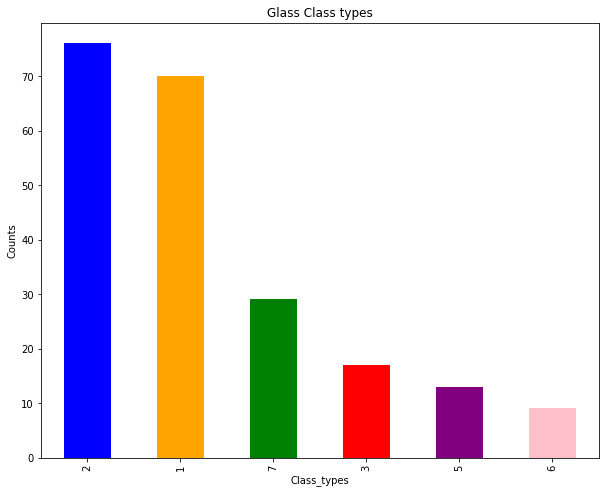

In [8]:
# Visualizing the same 
c = ['Blue', 'orange', 'green', 'red', 'purple', 'pink', 'brown']
fig = plt.figure(figsize = (10,8))
glass.Type.value_counts().plot(kind = "bar", color = c)
plt.title("Glass Class types")
plt.xlabel("Class_types")
plt.ylabel("Counts")
plt.plot()

#### Building the model

In [9]:
# Splitting the data into X and Y
X = glass.iloc[:, 0:9]

In [10]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [11]:
Y = glass.iloc[:, 9]

In [12]:
Y


0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [13]:
# Applying train and test split 

x_train,x_test,y_train,y_test =train_test_split(X,Y, test_size = 0.25, random_state = 0)

In [48]:
model = KNeighborsClassifier(n_neighbors = 1, metric = 'manhattan')

In [49]:
model.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [50]:
y_preds = model.predict(x_test)

In [51]:
y_preds

array([7, 1, 1, 6, 5, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 7, 1, 1, 3, 3, 5, 2,
       7, 7, 1, 1, 7, 1, 2, 2, 1, 3, 2, 1, 1, 1, 1, 1, 1, 7, 2, 7, 2, 1,
       2, 2, 1, 2, 1, 2, 1, 6, 7, 1], dtype=int64)

In [52]:
# Checking the accuracy
accuracy = accuracy_score(y_test, y_preds)

In [53]:
accuracy

0.7222222222222222

Inference: Accuracy of the model is 72.22%  

In [ ]:
# Checking for the best K value 

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors = neighbors)

In [22]:
model_grid = KNeighborsClassifier()
grid = GridSearchCV(estimator = model_grid, param_grid = param_grid)
grid.fit(X,Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [23]:
print(grid.best_score_)
print(grid.best_params_)

0.640531561461794
{'n_neighbors': 1}


Inference : From this we came to know that best K value can be 1 so we have used n_neighbors = 1